In [348]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [349]:
# Declare the path csv path and sheet name
path = "API_SP.POP.TOTL_DS2_en_csv_v2_6224560.csv"


df = pd.read_csv(
    path,
    skiprows=4
)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [368]:
country_available = df['Country Name']

index = country_available[country_available == 'Colombia'].index[0]
country_selected = df.iloc[index, ]

country_selected

Country Name               Colombia
Country Code                    COL
Indicator Name    Population, total
Indicator Code          SP.POP.TOTL
1960                     15687688.0
                        ...        
2019                     50187406.0
2020                     50930662.0
2021                     51516562.0
2022                     51874024.0
Unnamed: 67                     NaN
Name: 45, Length: 68, dtype: object

In [369]:
# Get the country name
country_name = country_selected \
                .iloc[0]

years_populations = country_selected \
                    .iloc[4: -1] \
                    .astype(int)

years_populations

1960    15687688
1961    16182414
1962    16691282
1963    17210956
1964    17739754
          ...   
2018    49276961
2019    50187406
2020    50930662
2021    51516562
2022    51874024
Name: 45, Length: 63, dtype: int64

In [370]:
data_selected = years_populations[-6:]

x = data_selected.index \
    .to_numpy() \
    .astype(int)

y = data_selected \
    .to_numpy()


matrix = np.vander(
    x,
    len(x)
)

coeficientes = np.linalg.solve(
    matrix, 
    y
)
coeficientes

array([ 1.65725313e+03, -1.67310922e+07,  6.75646550e+10, -1.36422081e+14,
        1.37727167e+17, -5.56178740e+19])

In [373]:
x_test_data = np.arange(2017, 2025)

result = np.polyval(
    coeficientes,
    x_test_data
)

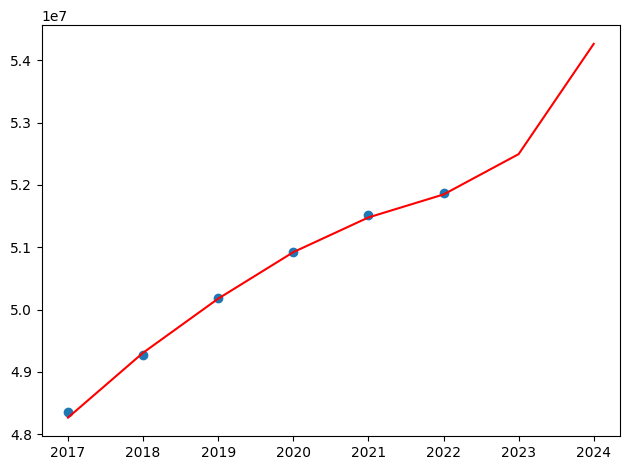

In [374]:
plt.scatter(
    x,
    y,
)

plt.plot(
    x_test_data,
    result,
    color='red'
)

plt.tight_layout()
plt.show()

In [381]:
x_years_all = years_populations.index \
    .to_numpy() \
    .astype(int)

y_years_all = years_populations \
    .to_numpy()


x_predicted =  np.arange(2020, 2030)

y_predicted = np.polyval(
    coeficientes,
    x_predicted
)

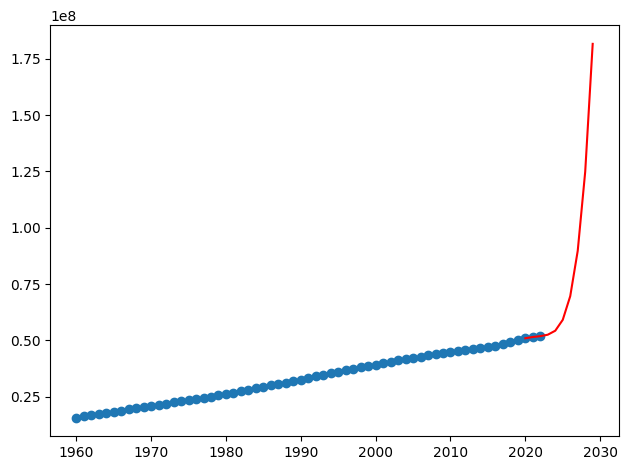

In [382]:
plt.scatter(
    x_years_all,
    y_years_all,
)

plt.plot(
    x_predicted,
    y_predicted,
    color='red'
)

plt.tight_layout()
plt.show()

In [357]:
data = np.array(
    [
        [1, -6],
        [2, 2],
        [4, 12],
        [3, -10]
    ],
    dtype = int
)

x_value = data[:, 0]
y_value = data[:, 1]
x_value, y_value

(array([1, 2, 4, 3]), array([ -6,   2,  12, -10]))

In [358]:
matrix = np.vander(
    x_value,
    len(x_value)
)
matrix

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [64, 16,  4,  1],
       [27,  9,  3,  1]])

In [359]:
coefficients = np.linalg.solve(
    matrix,
    y_value
)
coefficients

array([  9., -64., 137., -88.])

In [360]:
equation_function = lambda x : \
        + coefficients[0] * x**3 \
        + coefficients[1] * x**2 \
        + coefficients[2] * x \
        + coefficients[3]

In [361]:
polyfunction = lambda x : np.polyval(
    coefficients,
    x
)

In [362]:
data_predicted = np.arange(0, 7)

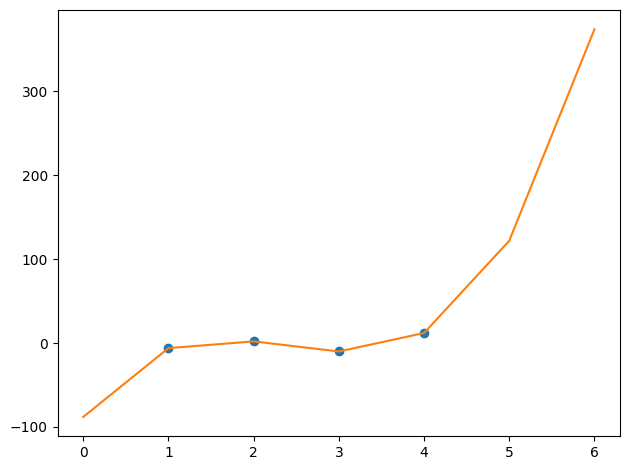

In [363]:
plt.plot(
    x_value,
    y_value,
    'o'
)

plt.plot(
    data_predicted,
    polyfunction(data_predicted),
)

# plt.plot(
#     data_predicted,
#     equation_function(data_predicted),
# )

plt.tight_layout()
plt.show()